# ECON 441B: Week 3 Assignment
Courtney Manhart

# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week 3/fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one must be trans_date_trans)

In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# Including the dependent variable is_fraud
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0
...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,travel,7.99,129,0


# 3.) Create a unique variable out of trans_date.

In [8]:
type(df_select['trans_date_trans_time'][0])

str

In [9]:
# Convert to date_time
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])

<ipython-input-9-5287d1e9218a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])


In [10]:
type(df_select['trans_date_trans_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Looking at Month to visualize fraud
df_select['time_var'] = [i.month for i in df_select['trans_date_trans_time']]

<ipython-input-11-5345f69a5131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.month for i in df_select['trans_date_trans_time']]


In [12]:
# Create Dummies
X = pd.get_dummies(df_select[['amt', 'city_pop', 'time_var', 'category']], 
                   ['category'])
y = df_select['is_fraud']

In [13]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

# Skip 4

# 5.) Train a Logistic regression.

In [15]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression().fit(X_scale, y)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? 

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_scale)
cm = confusion_matrix(y, y_pred)
print(cm[:])
fn, tp = cm[:, 0]
print(fn, tp)

[[553415    159]
 [  2145      0]]
553415 2145


In [35]:
from sklearn.metrics import confusion_matrix

# train and fit a logistic regression model 
log_reg = LogisticRegression().fit(X_scale, y)

y_pred_prob = log_reg.predict_proba(X_scale)[:,1]

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Set an initial threshold
thresh = 0.5

# Calc Desired False Positive Percentage
fp_target = 5

# Continuously increase threshold until desired false positive % achived
while True:
  y_pred = (y_pred_prob < thresh).astype(int)
  cm = confusion_matrix(y, y_pred)
  fn, tn = cm[:, 1]
  tp, fp = cm[:, 0]
  current_fp_percent = (fp/(tp+fp)) * 100
  if current_fp_percent <= fp_target:
    break
  thresh += 0.01

thresh





0.5

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [36]:
# Creating our predicted values
y_pred = log_reg.predict(X_scale) 

y_pred == y

0         True
1         True
2         True
3         True
4         True
          ... 
555714    True
555715    True
555716    True
555717    True
555718    True
Name: is_fraud, Length: 555719, dtype: bool

In [37]:
# Calculating the cost for each transaction 
costs = []
for i in range(len(y_pred)):

  # If transaction is True (pred = real = Fraud), 0.02 * amt
  if y_pred[i] == y[i] == 1:
    cost = 0.02 * X['amt'][i]
    costs.append(cost)

  # If transaction is False (prediction != real & real = Fraud), -1*amt 
  elif y_pred[i] != y[i] and y[i] == 1:
    cost = -1 * X['amt'][i]
    costs.append(cost)
  
  else:
    costs.append(0)

In [38]:
# Calculating Total Cost:
np.sum(costs)

-1133324.6799999997

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [39]:
log_lasso = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X, y) 


In [40]:
# Looking at Coefficients
coefs = log_lasso.coef_

coef_name = X.columns

coefficients = pd.DataFrame(coefs[0], index = coef_name, columns = ['Coefficient'])
coefficients

,Coefficient
amt,2.091214e-03
city_pop,-4.158909e-07
time_var,-1.083288e-01
category_entertainment,-4.496787e+00
category_food_dining,-4.533253e+00
category_gas_transport,-3.883708e+00
category_grocery_net,-4.082255e+00
category_grocery_pos,-2.772642e+00
category_health_fitness,-4.505912e+00
category_home,-4.621004e+00


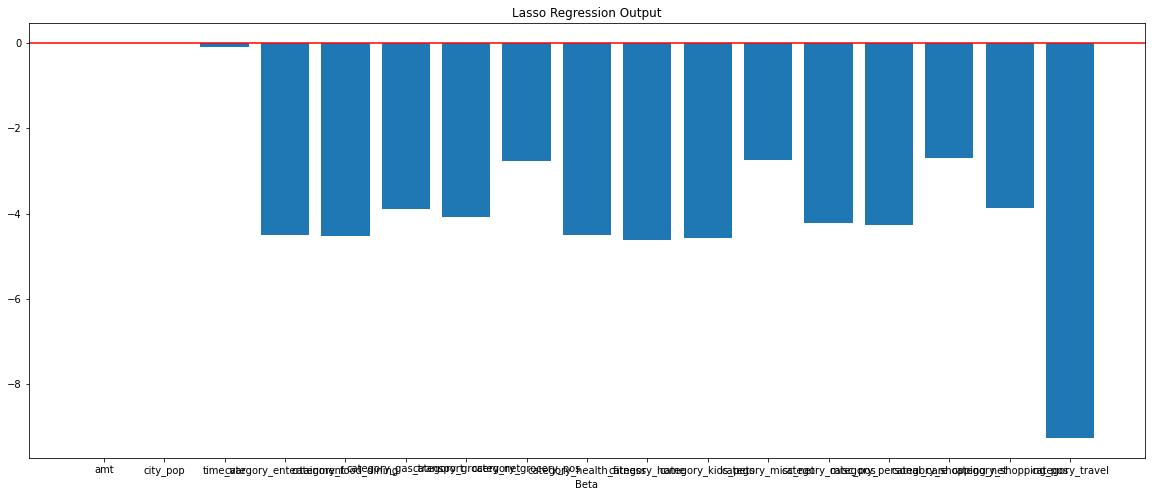

In [41]:
# Plotting the Coefficients
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))

plt.bar(coefficients.index, coefficients['Coefficient'])
plt.axhline(0, color = 'red')
plt.title('Lasso Regression Output')
plt.xlabel('Beta')
plt.show()

The coeffients are not zero. 